
# Obteniendo y tratando datos con NumPy y Pandas: Prueba de evaluación

## 1. Manipulación de XML

Utiliza el dataset en XML “U.S. Overseas Loans and Grants (Greenbook)” en un
Notebook para lo siguiente

In [24]:
from lxml import objectify
parsed = objectify.parse('fa.xml')
root = parsed.getroot()

print root.tag
print root.attrib
print root.countchildren()

country=[]
name=[]
unit =[]
year=[]
amount=[]
kind =[]
program = []
for row in root.ForeignAssistanceRow:
    country.append(row.RecipientCountry.text)
    name.append(row.ProgramName.text)
    unit.append(row.UnitName.text)
    year.append(row.FiscalYear.text)
    amount.append(row.Obligations.text)
    kind.append(row.AssistanceType.text)
    program.append(row.ProgramName.text)
print len(country), len(name), len(unit), len(year), len(amount)

ForeignAssistance
{}
8278
8278 8278 8278 8278 8278


### 1.1 Cargar los datos en un pandas DataFrame

In [25]:
import pandas as pd
data = pd.DataFrame()
data['country'] = country
data['name'] = name
data['unit'] = unit
data['year'] = year
data['amount'] = amount
data['type'] = kind
data['program'] = program

# Always remember to check types and convert if needed:
print type(data['amount'][0])
data['amount'] = pd.Series(amount, dtype="int64") # En mi PC es necesario convertirlo a int64 o da error!
print type(data['amount'][0])

data.head(5)

<type 'str'>
<type 'numpy.int64'>


,country,name,unit,year,amount,type,program
0,Afghanistan,Child Survival and Health,Constant 2011 $US,2002,2691390,Economic,Child Survival and Health
1,Afghanistan,Child Survival and Health,Constant 2011 $US,2003,58817159,Economic,Child Survival and Health
2,Afghanistan,Child Survival and Health,Constant 2011 $US,2004,41877130,Economic,Child Survival and Health
3,Afghanistan,Child Survival and Health,Constant 2011 $US,2005,41467658,Economic,Child Survival and Health
4,Afghanistan,Child Survival and Health,Constant 2011 $US,2006,42463433,Economic,Child Survival and Health


### 1.2 Encontrar los diferentes programas (“ProgramName”) en el data set. Necesitarás una function para obtener los valores únicos.

In [26]:
unique_programs = data["program"].unique()

print unique_programs
len(unique_programs)

['Child Survival and Health' 'Department of Defense Security Assistance'
 'Development Assistance'
 'Economic Support Fund/Security Support Assistance' 'Food For Education'
 'Global HIV/AIDS Initiative' 'Global Health and Child Survival'
 'Inactive Programs' 'Migration and Refugee Assistance' 'Narcotics Control'
 'Nonproliferation, Anti-Terrorism, Demining and Related'
 'Other Active Grant Programs' 'Other Food Aid Programs'
 'Other State Assistance' 'Other USAID Assistance' 'Other USDA Assistance'
 'Peace Corps' 'Title I' 'Title II' 'Millennium Challenge Corporation'
 'Voluntary Contributions to Multilateral Organizations, Total']


21

### 1.3 Obten los seis programas que han gastado más dinero (recuerda que las cifras monetarias no son homogéneas).

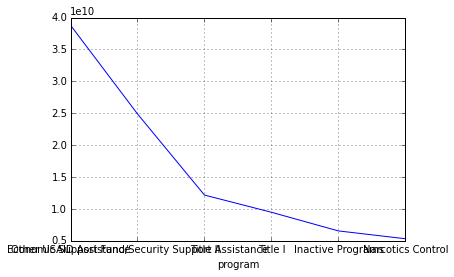

In [33]:
program = data[data['unit']=='Constant 2011 $US']

programly = program.groupby(["program"])
per_program = programly["amount"].sum()
per_program.sort(ascending=False)
program_top = per_program.head(6)

%matplotlib inline
per_program.head(6).plot()

### 1.4 Dibujas las cantidades con una apariencia como la siguiente.

In [31]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

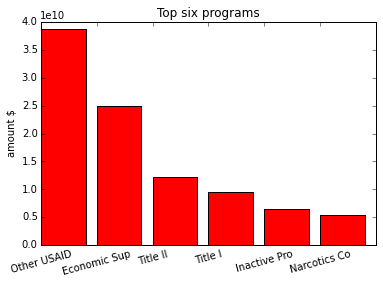

In [37]:
names = [name[:12] for name in list(program_top.index)]
pos = range(len(program_top))

line = plt.bar(pos, program_top, color="r")
plt.xticks(pos, names, rotation=15)
plt.title("Top six programs")
plt.ylabel("amount $")
plt.savefig("programs_constant_$.jpg", bbox_size=200)

## 2. Uso de APIs Web

## 2.1 Obtén la primera página.

In [38]:
import requests as rq
req = rq.get('https://api.angel.co/1/startups?filter=raising&access_token=08036df13051d5d9b4eb645f9ae1a427b58fbfadaddb7b6b')
print req.status_code
print req.headers['content-type']
print req.text

200
application/json; charset=utf-8
{"startups":[{"id":126292,"hidden":false,"community_profile":false,"name":"Sailsquare","angellist_url":"https://angel.co/sailsquare","logo_url":"https://d1qb2nb5cznatu.cloudfront.net/startups/i/126292-757dbcc7a4d31e444f0232792b5b8324-medium_jpg.jpg?buster=1352995353","thumb_url":"https://d1qb2nb5cznatu.cloudfront.net/startups/i/126292-757dbcc7a4d31e444f0232792b5b8324-thumb_jpg.jpg?buster=1352995353","launch_date":"2013-02-01","quality":4,"product_desc":"sailsquare connects people who have a boat with people who want to make an experience at sea. Through a peer-to-peer platform, travelers can participate in sailing experiences directly offered by private boat owners.\n\nOur mission is to make sailing holidays a unique experience, accessible to anyone, enabling the sharing of experiences among people from all over the world.\n\nBy building a community around our marketplace we ensure a higher engagement level and loyalty of our customers. On the other 

## 2.2 Carga los datos del JSON a un DataFrame con por lo menos los siguientes campos: URL de la compañía en AngelList, el campo “quality” y la “location” (solo la primera si tiene varias), fecha de aperture de la ronda, cantidad que se quiere obtener (raising amount), pre-money valuation y cantidad obtenida (raised amount).

In [42]:
from urllib2 import Request, urlopen
import json

req=Request('https://api.angel.co/1/startups?filter=raising&access_token=08036df13051d5d9b4eb645f9ae1a427b58fbfadaddb7b6b')
res = urlopen(req)
angel = res.read()
companies = json.loads(angel)
companies_data.keys()

[u'last_page', u'per_page', u'startups', u'total', u'page']

In [58]:
data=companies_data['startups']

import pandas as pd 
x=pd.Series(data[0])
print x['fundraising']
print x['locations']
print x['quality']
print x['name']
print x[['angellist_url']]

{u'raised_amount': 0.0, u'updated_at': u'2015-09-24T15:34:54Z', u'round_opened_at': u'2015-09-24', u'discount': None, u'pre_money_valuation': 10000000, u'equity_basis': u'equity', u'public': True, u'raising_amount': 3000000}
[{u'angellist_url': u'https://angel.co/milan-1', u'display_name': u'Milan', u'id': 2187, u'name': u'milan', u'tag_type': u'LocationTag'}]
4
Sailsquare
angellist_url    https://angel.co/sailsquare
dtype: object


### Obtenemos el quality y el URL en Angellist

In [50]:
calidad=[]
url_angellist=[]
names=[]
for n in range(len(data)):
     
    try:
        quality=data[n]['quality']
        calidad.append(quality)
    except IndexError: 
        raising_amount.append('no quality')
    
    try:
        url_angel=data[n]['angellist_url']
        url_angellist.append(url_angel)
    except IndexError: 
        raising_amount.append('no angellist url')
    
    try:
        name=data[n]['name']
        names.append(name)
    except IndexError: 
        raising_amount.append('no name')

###Extraemos los datos que se encuentran dentro de fundraising

In [55]:
raising_amount=[]
raised_amount=[]
round_opened=[]
pre_money=[]

for n in range(len(data)):
    try:
        fundraise=data[n]['fundraising']['raising_amount']
        raising_amount.append(fundraise)
    except IndexError: 
        raising_amount.append('no raising_amount')
    try:        
        fundraised=data[n]['fundraising']['raised_amount']
        raised_amount.append(fundraised)
    except IndexError: 
        raised_amount.append('no raised_amount')
    
    try:
        round2=data[n]['fundraising']['round_opened_at']
        round_opened.append(round2)
    except IndexError: 
        round_opened.append('no round_opened_at')
    
    try:
        money=data[n]['fundraising']['pre_money_valuation']
        pre_money.append(money)
    except IndexError: 
        pre_money.append('no pre-money valuation')

### Extraemos los datos de locations

In [63]:
for r in range(50):
    try:
        place=data[r]['locations'][0]['display_name']
        location.append(place)
    except IndexError: 
        location.append('no location included')

### Introducimos los datos en un dataframe

In [66]:
url=pd.DataFrame(data=url_angellist,columns=['URL_Angellist'])
quality=pd.DataFrame(data=calidad,columns=['Quality'])
location=pd.DataFrame(data=location,columns=['Location'])
raising=pd.DataFrame(data=raising_amount,columns=['Raising Amount'])
raised=pd.DataFrame(data=raised_amount,columns=['Raised Amount'])
pre_money=pd.DataFrame(data=pre_money,columns=['Pre-Money Valuation'])
round1=pd.DataFrame(data=round_opened,columns=['Pre-round open'])
company_name=pd.DataFrame(data=names,columns=['Company name'])

final=pd.concat([company_name,url,quality,location,raising,raised,pre_money,round1],axis=1)
final.head(5)

,Company name,URL_Angellist,Quality,Location,Raising Amount,Raised Amount,Pre-Money Valuation,Pre-round open
0,Sailsquare,https://angel.co/sailsquare,4,Milan,3000000,0,10000000,2015-09-24
1,Trio Custom Clothiers,https://angel.co/trio-custom-clothiers,5,Atlanta,1000000,0,3000000,2015-09-24
2,Slope,https://angel.co/slope,6,Seattle,1000000,0,5000000,2015-09-23
3,Guiddoo World,https://angel.co/guiddoo-tours,5,Mumbai,2000000,0,8000000,2015-09-22
4,POLCO,https://angel.co/polco-the-political-compass-1,5,Bryan,500000,50000,4000000,2015-09-22


## 2.3 Después obtén la siguiente información

### Porcentaje de la cantidad obtenida respect a la esperada (para cada startup), ordenada de mayor porcentaje a menor.

In [68]:
percentage=pd.DataFrame()
percentage['Company name']=final['Company name']
percentage['Obtenido vs Esperado (%)']=(final['Raised Amount']/final['Raising Amount'])*100
print percentage.sort('Obtenido vs Esperado (%)', ascending = False)

             Company name  Obtenido vs Esperado (%)
7                 Tamatem                 50.000000
43                 OpenEd                 46.750000
41             Crossfader                 41.666667
27               Coursmos                 20.000000
16             Springleap                 16.153846
22                 Qoints                 13.333333
35         Search in MENA                 10.714286
4                   POLCO                 10.000000
12             Plasticity                  6.666667
39            Knightscope                  5.150000
48               Sanguine                  4.500000
42                 MyCity                  0.000000
44                 Birdzi                  0.000000
29        Upside Commerce                  0.000000
30               IntroNet                  0.000000
31                  Xceed                  0.000000
32                GeoMoby                  0.000000
33               Medigram                  0.000000
34          

### Investiga si el número “quality” correlaciona con la cantidad solicitada o el pre-money valuation.

In [73]:
quality=pd.DataFrame()
quality['Quality']=final['Quality']
quality['Obtenido vs Esperado (%)']=percentage['Obtenido vs Esperado (%)']
s=final['Pre-Money Valuation']
s2=s.fillna(0)
quality['pre-money valuation']=s2
quality.head(5)

,Quality,Obtenido vs Esperado (%),pre-money valuation
0,4,0,10000000
1,5,0,3000000
2,6,0,5000000
3,5,0,8000000
4,5,10,4000000


In [75]:
print "correlacion Quality vs Porcentaje obtenido" 
print quality['Quality'].corr(quality['Obtenido vs Esperado (%)'])
print""
print "correlacion Quality vs Pre-money valuation" 
print quality['Quality'].corr(s2)

correlacion Quality vs Porcentaje obtenido
0.486835099246

correlacion Quality vs Pre-money valuation
-0.155136321819


## 2.4 Finalmente, dibuja las cinco startups que tienen un ratio mayor de raising amount/pre-money valuation, dibujando ambos valores en un stacked bar plot.

In [78]:
ratio=pd.DataFrame()
ratio['Company name']=final['Company name']
ratio['ratio']= final['Raising Amount']/final['Pre-Money Valuation']
ratio.sort('ratio',ascending=False).head(5)

,Company name,ratio
21,BIOGENIQ,0.416667
5,PlanDo,0.400000
44,Birdzi,0.350000
1,Trio Custom Clothiers,0.333333
49,Osblue,0.307692


### Pintamos el resultado en un stacked bar plot

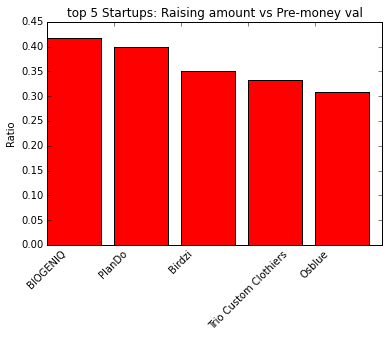

In [80]:
import numpy as np
import matplotlib.pyplot as plt

companies = [name for name in list(ranking['Company name'])]
pos = [1, 2, 3, 4, 5]
line = plt.bar(pos, ranking['ratio'], color="r")
plt.xticks(pos, companies, rotation = 45)
plt.title("top 5 Startups: Raising amount vs Pre-money val")
plt.ylabel("Ratio")
plt.show()

## 3. Uso de HDF5

### Copiar los contenidos del dataset churn.txt utlizado en clase

In [92]:
import pandas as pd 
import numpy as np
from pandas import HDFStore,DataFrame

churn= pd.DataFrame.from_csv('churn.txt').reset_index()
True=churn[churn['Churn?']=='True.']
False=churn[churn['Churn?']=='False.']

hdf=HDFStore('final.h5')
hdf.put('/root',churn,format='table',data_columns=True)

print hdf['/root'].shape

hdf.put('/root/C1',True,format='table',data_columns=True)
hdf.put('/root/C2',False,format='table',data_columns=True)

print hdf['/root/C1'].shape
print hdf['/root/C2'].shape

(3333, 21)
(483, 21)
(2850, 21)


### Accedemos a los datos del root

In [94]:
pd.read_hdf('final.h5','/root').tail(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


### Accedemos a los datos de C1 y C2

In [102]:
pd.read_hdf('final.h5','/root/C1').head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True.
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True.


In [101]:
pd.read_hdf('examen.h5','/root').head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Calcularemos la media de la columna Account Length, para ello tendremos que extraer iterando los datos del HDF5

In [103]:
contenido=hdf.root.root.table[:]

In [104]:
%%timeit x=[]
for n in range(len(contenido)):
    d=contenido[n][2]
    x.append(d)
x1=np.array(x)
print np.mean(x1)

101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.06

### Calculamos la media desde el fichero original convertido en DataFrame.

In [105]:
%%timeit
s=churn['Account Length']
print s.mean()
##Ha tardado 342 microsegundos

101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.064806481
101.06

### Tomamos tres columnas numéricas del dataset y utilizando regresión lineal describiremos si las variables elegidas son buenas para tener un modelo del abandono

In [106]:
modelo = pd.read_csv("churn.txt", usecols=["Account Length","Day Calls","Day Charge","Churn?"])

m1=modelo.replace("False.",'0')
m2=m1.replace("True.",'1')

import statsmodels.formula.api as sm
from pandas.stats.api import ols
df=modelo

res = ols(y=m2['Churn?'], x=m2[['Account Length','Day Calls','Day Charge']])
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <Account Length> + <Day Calls> + <Day Charge> + <intercept>

Number of Observations:         3333
Number of Degrees of Freedom:   4

R-squared:         0.0426
Adj R-squared:     0.0417

Rmse:              0.3446

F-stat (3, 3329):    49.3657, p-value:     0.0000

Degrees of Freedom: model 3, resid 3329

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
Account Length     0.0001     0.0002       0.86     0.3887    -0.0002     0.0004
     Day Calls     0.0003     0.0003       0.97     0.3307    -0.0003     0.0009
    Day Charge     0.0078     0.0006      12.08     0.0000     0.0065     0.0091
     intercept    -0.1354     0.0388      -3.49     0.0005    -0.2114    -0.0595
--------------------------------

Las variables Account Length y Day Calls tienen un valor mayor a 0.05, por lo que rechazamos la hipótesis nula, también podemos ver que el modelo tiene una R2 muy baja, por lo que no se ajusta del todo.